<a href="https://colab.research.google.com/github/shreyus3003/pathrise/blob/main/pathrise_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Challenge Assignment - Pathrise Data Analysis

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
file_path = "/content/Data_Pathrise.xlsx"
df = pd.DataFrame(pd.read_excel(file_path))

In [ ]:
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


df_n is the data obtained by droping the null values from program_duration_days column.

In [ ]:
df_n = df.dropna(subset=['program_duration_days'])

In [ ]:
df.dtypes

id                               int64
pathrise_status                 object
primary_track                   object
cohort_tag                      object
program_duration_days          float64
placed                           int64
employment_status               object
highest_level_of_education      object
length_of_job_search            object
biggest_challenge_in_search     object
professional_experience         object
work_authorization_status       object
number_of_interviews           float64
number_of_applications           int64
gender                          object
race                            object
dtype: object

In [ ]:
df_n.isnull().sum()

id                               0
pathrise_status                  0
primary_track                    0
cohort_tag                       6
program_duration_days            0
placed                           0
employment_status              182
highest_level_of_education      42
length_of_job_search            66
biggest_challenge_in_search     20
professional_experience        161
work_authorization_status      221
number_of_interviews           172
number_of_applications           0
gender                         371
race                            13
dtype: int64

In [ ]:
df_n.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,1928.000000,1928.000000,1928.000000,1756.000000,1928.000000
mean,1264.159751,136.098548,0.495851,2.203872,36.685166
std,736.662410,125.860248,0.500112,2.958306,52.729523
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,654.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1911.500000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


In [ ]:
# df_pathrise = df_n.drop(['id', 'work_authorization_status', 'gender', 'race'], axis=1)

In [ ]:
df_pathrise = df_n.drop(['id', 'gender', 'race'], axis=1)

## Final data to obtain insights.
Obtain the data by removing id, gender and race column which may not be useful from the data. These columns doesnt give much insights from data.

In [ ]:
df_pathrise.head()

,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications
2,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0
3,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25
4,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100
5,Closed Lost,SWE,AUG19A,0.0,0,Employed Full-Time,Master's Degree,1-2 months,Technical interviewing,3-4 years,Green Card,5.0,100
6,Closed Lost,SWE,AUG19B,0.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past phone screens,3-4 years,Green Card,0.0,9


## Bar plot
The below bar plot shows fellows enrolled more are into SWE track compared to other tracks.

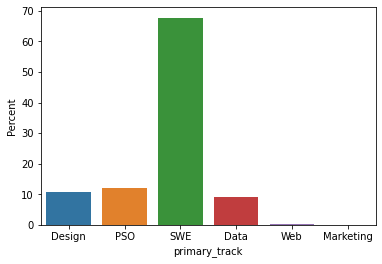

In [ ]:
ax = sns.barplot(x="primary_track", y="placed", data=df_pathrise, estimator=lambda x: len(x) / len(df_pathrise) * 100)
ax.set(ylabel="Percent")
plt.show()

More than 70% of pathrise fellows are into SWE track.

In [ ]:
df_dur = df_pathrise[df_pathrise["program_duration_days"] != 0 ]
df_dur = df_dur[df_dur["pathrise_status"] == 'Placed']
df_dur

,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications
4,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100
23,Placed,PSO,NOV19B,193.0,1,Unemployed,Master's Degree,6 months to a year,Hearing back on my applications,1-2 years,Citizen,5.0,4
30,Placed,SWE,NOV19A,73.0,1,Student,Master's Degree,Less than one month,Figuring out which jobs to apply for,1-2 years,F1 Visa/CPT,0.0,1
39,Placed,SWE,NOV19A,83.0,1,Employed Full-Time,Master's Degree,3-5 months,Getting past final round interviews,5+ years,F1 Visa/OPT,NaN,15
54,Placed,SWE,AUG19A,76.0,1,Student,Master's Degree,Less than one month,Getting past final round interviews,3-4 years,F1 Visa/OPT,0.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,Placed,SWE,JAN19B,31.0,1,Student,Bachelor's Degree,NaN,Figuring out which jobs to apply for,Less than one year,NaN,6.0,6
2528,Placed,Design,FEB20A,277.0,1,Student,Doctorate or Professional Degree,Less than one month,Technical interviewing,5+ years,Other,NaN,45
2531,Placed,SWE,AUG19A,310.0,1,Unemployed,Doctorate or Professional Degree,Less than one month,Technical skills,NaN,F1 Visa/OPT,0.0,6
2533,Placed,Design,MAR18A,33.0,1,NaN,Bachelor's Degree,1-2 months,Hearing back on my applications,3-4 years,F1 Visa/OPT,0.0,9


[Text(0, 0.5, 'Percent')]

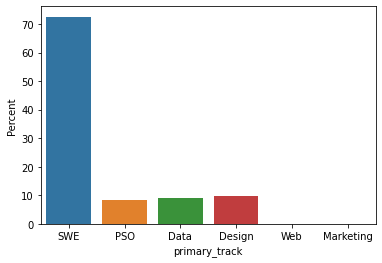

In [ ]:
ax = sns.barplot(x="primary_track", y="program_duration_days", data=df_dur, estimator=lambda x: len(x) / len(df_dur) * 100)
ax.set(ylabel="Percent")

## Pathrise fellow status

The below plot shows the pathrise fellow status, a trend of which tack is getting placed more in number. SWE track is more in number joining pathrise and more in number placed through the program.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


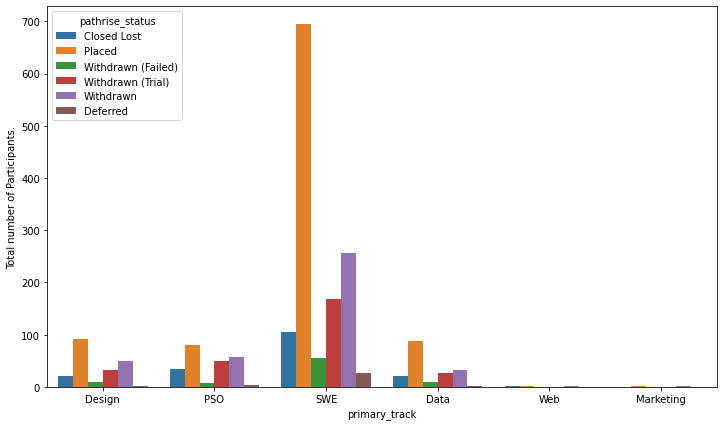

In [ ]:
plt.figure(figsize=(12,7))
ax = sns.countplot('primary_track',hue='pathrise_status', data = df_pathrise )
plt.ylabel('Total number of Participants.')
plt.show()

Work authoirization versus pathrise status plot shows a trend of more number of citizens are enrolled in the program and having been placed. F1/OPT number is the second highest who is joining the program.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


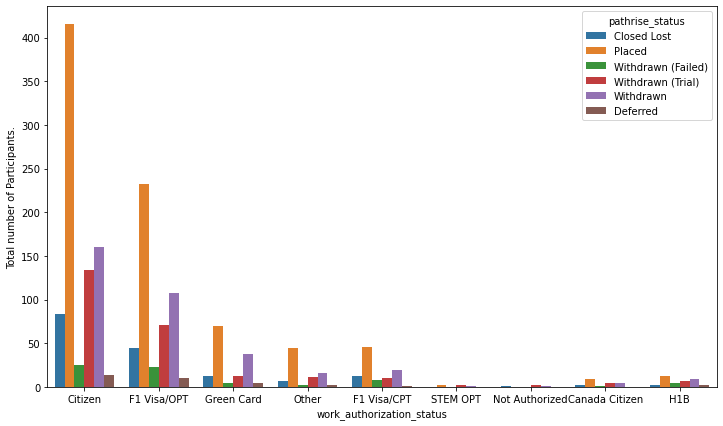

In [ ]:
plt.figure(figsize=(12,7))
ax = sns.countplot('work_authorization_status',hue='pathrise_status', data = df_pathrise )
plt.ylabel('Total number of Participants.')
plt.show()

The below plot shows on an average web and marketing track fellows take more number of days in pathrise program to get placed.

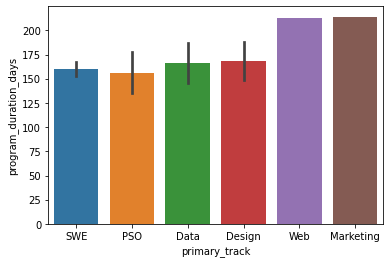

In [ ]:
sns.barplot(data=df_dur,x='primary_track', y='program_duration_days')
plt.show()

In [ ]:
df_swe = df_dur[df_dur["primary_track"] == 'SWE']
df_swe.shape

(693, 13)

In [ ]:
# plt.figure(figsize=(12,7))
# ax = sns.countplot('primary_track',hue='program_duration_days', data = df_swe )
# plt.ylabel('Total number of Participants.')
# plt.show()

In [ ]:
df_pathrise.shape


(1928, 13)

## Feature Engineering for prediction.

In [ ]:
file_path = "/content/Data_Pathrise.xlsx"
df_fe = pd.DataFrame(pd.read_excel(file_path))
df_fe = df_fe.drop(['id', 'gender', 'race'], axis=1)
df_fe.shape

(2544, 13)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

path_enc = OrdinalEncoder()
df_fe["primary_track_code"] = path_enc.fit_transform(df_fe[["primary_track"]])
df_fe[["primary_track", "primary_track_code"]].head(20)

,primary_track,primary_track_code
0,SWE,4.0
1,PSO,3.0
2,Design,1.0
3,PSO,3.0
4,SWE,4.0
5,SWE,4.0
6,SWE,4.0
7,SWE,4.0
8,SWE,4.0
9,SWE,4.0


In [ ]:
df_fe = df_fe.dropna(subset=['professional_experience','highest_level_of_education'])
df_fe.shape

(2270, 14)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

path_en = OneHotEncoder()
path_exp = path_en.fit_transform(df_fe[["professional_experience"]])
pd.DataFrame(path_exp.toarray(), columns=path_en.categories_).head()

,1-2 years,3-4 years,5+ years,Less than one year
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0


In [ ]:
df_fe = df_fe.join(pd.DataFrame(path_exp.toarray(), columns=path_en.categories_))

In [ ]:
path_edu = path_en.fit_transform(df_fe[["highest_level_of_education"]])
pd.DataFrame(path_edu.toarray(), columns=path_en.categories_).head()

,Bachelor's Degree,Doctorate or Professional Degree,GED or equivalent,High School Graduate,Master's Degree,"Some College, No Degree",Some High School
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_fe = df_fe.join(pd.DataFrame(path_edu.toarray(), columns=path_en.categories_))

In [ ]:
df_fe.shape

(2270, 25)

## Real time test data extraction.


In [ ]:
df_active = df_fe[df_fe["pathrise_status"] == 'Active']

In [ ]:
df_active = df_active.drop(['program_duration_days'], axis=1)

Let the active fellows be the real time test data to check if they will get placed.

In [ ]:
df_active.shape

(466, 24)

In [ ]:
df_fe.isna().sum()

pathrise_status                          0
primary_track                            0
cohort_tag                               8
program_duration_days                  543
placed                                   0
employment_status                      207
highest_level_of_education               0
length_of_job_search                    67
biggest_challenge_in_search             20
professional_experience                  0
work_authorization_status              254
number_of_interviews                   207
number_of_applications                   0
primary_track_code                       0
(1-2 years,)                           235
(3-4 years,)                           235
(5+ years,)                            235
(Less than one year,)                  235
(Bachelor's Degree,)                   235
(Doctorate or Professional Degree,)    235
(GED or equivalent,)                   235
(High School Graduate,)                235
(Master's Degree,)                     235
(Some Colle

In [ ]:
df_final_x = df_fe.drop(['pathrise_status','primary_track','employment_status ','cohort_tag', 'highest_level_of_education','professional_experience', 'length_of_job_search', 'biggest_challenge_in_search', 'work_authorization_status', 'number_of_interviews', 'number_of_applications'],axis=1 )

In [ ]:
df_final_x.head(2)

,program_duration_days,placed,primary_track_code,"(1-2 years,)","(3-4 years,)","(5+ years,)","(Less than one year,)","(Bachelor's Degree,)","(Doctorate or Professional Degree,)","(GED or equivalent,)","(High School Graduate,)","(Master's Degree,)","(Some College, No Degree,)","(Some High School,)"
0,NaN,0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## For employment prediction.
To check if a fellow will get placed.
droping duration of days.

In [ ]:
df_final_x = df_final_x.dropna()
df_final_x.shape

(1551, 14)

In [ ]:
y_final = df_final_x['placed']
y_final

2       0
3       0
4       1
5       0
6       0
       ..
2260    1
2263    0
2264    1
2268    1
2269    1
Name: placed, Length: 1551, dtype: int64

In [ ]:
df_final_x = df_final_x.drop(['placed'], axis=1)


In [ ]:
df_final_x

,program_duration_days,primary_track_code,"(1-2 years,)","(3-4 years,)","(5+ years,)","(Less than one year,)","(Bachelor's Degree,)","(Doctorate or Professional Degree,)","(GED or equivalent,)","(High School Graduate,)","(Master's Degree,)","(Some College, No Degree,)","(Some High School,)"
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,89.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,26.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2263,208.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2264,313.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2268,336.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df_final_x,y_final,test_size=0.2,random_state=50)

In [ ]:
logit=LogisticRegression()

In [ ]:
logit.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logit_predict=logit.predict(x_test)

In [ ]:
accuracy_score(y_test,logit_predict)

0.6430868167202572

In [ ]:
# df_pathrise["professional_experience_code"] = ord_enc.fit_transform(df_pathrise[["professional_experience"]])
# df_pathrise[["professional_experience", "professional_experience_code"]].head(20)

In [ ]:
# df_pathrise = df_pathrise.dropna(subset=['work_authorization_status'])
# df_pathrise.shape

In [ ]:
# df_pathrise["work_authorization_status"] = df_pathrise["work_authorization_status"].astype('category')
# df_pathrise.dtypes

In [ ]:
# df_pathrise["work_authorization_status_code"] = df_pathrise["work_authorization_status"].cat.codes


In [ ]:
# df_pathrise["work_authorization_status_code"] = ord_enc.fit_transform(df_pathrise[["work_authorization_status"]])
# df_pathrise[["work_authorization_status", "work_authorization_status_code"]].head(20)

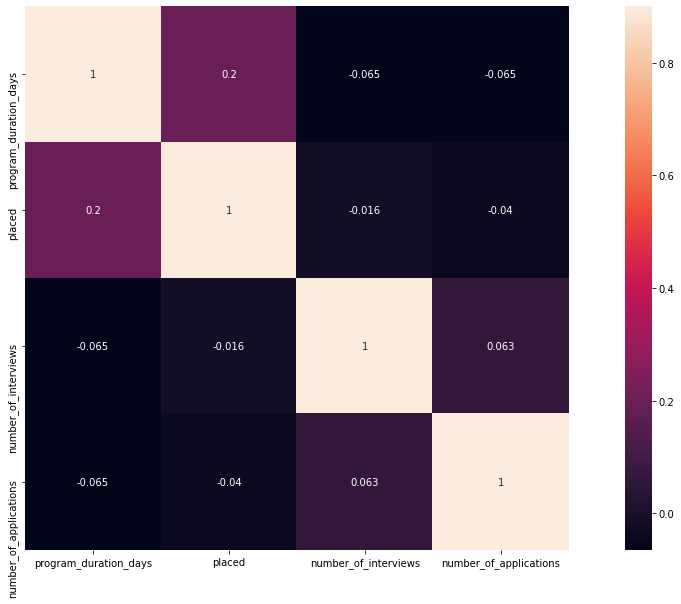

In [ ]:
correlation = df_pathrise.corr(method='pearson')
fig, ax = plt.subplots(figsize = (30,20))
fig.set_size_inches(20,10)
sns.heatmap(correlation,vmax = 0.9, square = True, annot = True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xscaled = scaler.fit_transform(df_final_x)

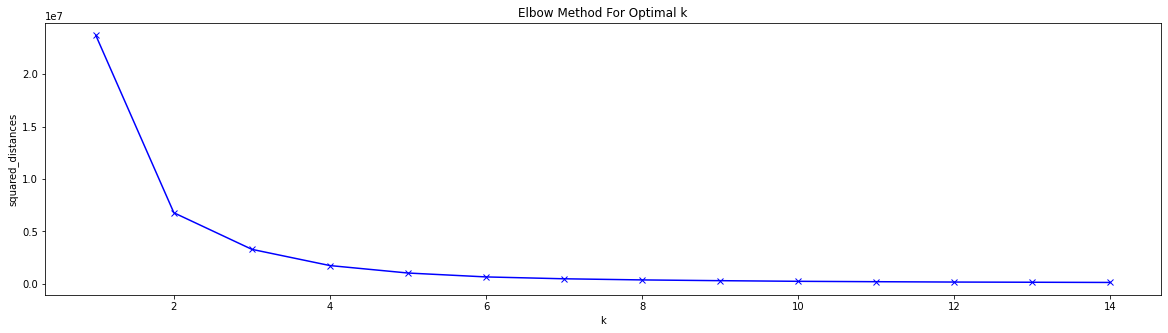

In [ ]:
from sklearn.cluster import KMeans
sqd = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_final_x)
    sqd.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, sqd, 'bx-')
plt.xlabel('k')
plt.ylabel('squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans_ = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans_.fit_predict(xscaled)
kmeans_clus = df_final_x.assign(Cluster=y_kmeans)
kmeans_group = kmeans_clus.groupby(['Cluster']).mean().round(1)
kmeans_group

,program_duration_days,primary_track_code,"(1-2 years,)","(3-4 years,)","(5+ years,)","(Less than one year,)","(Bachelor's Degree,)","(Doctorate or Professional Degree,)","(GED or equivalent,)","(High School Graduate,)","(Master's Degree,)","(Some College, No Degree,)","(Some High School,)"
Cluster,,,,,,,,,,,,,
0,133.5,3.3,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.3,0.1,0.0
1,140.0,3.2,1.0,0.0,0.0,0.0,0.5,0.1,0.0,0.0,0.3,0.1,0.0
2,129.5,3.2,0.0,0.7,0.3,0.0,0.5,0.1,0.0,0.0,0.3,0.1,0.0


In [ ]:
kmeans_group.shape

(3, 13)

In [ ]:
from sklearn.metrics import silhouette_score
fig = plt.figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

# ax.scatter3D(df_final_x,c=y_kmeans, cmap='rainbow')
ax.scatter3D(df_final_x['primary_track_code'],df_final_x['program_duration_days'],c=y_kmeans, cmap='rainbow')

# xLabel = ax.set_xlabel('Age', linespacing=3.2)
# yLabel = ax.set_ylabel('Systolic BP', linespacing=3.1)
# zLabel = ax.set_zlabel('Total Cholestrol', linespacing=3.4)
print("K-Means")

<Figure size 800x560 with 0 Axes>

K-Means


In [ ]:
import numpy as np

u_labels = np.unique(y_kmeans)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df_final_x[y_kmeans == i , 0] , df_final_x[y_kmeans == i , 1] , y_kmeans = i)
plt.legend()
plt.show()

TypeError: ignored